# Ethan Hsu

## Research question/interests

**I am interested in what genre each platform uploads the most, like what each genre is the most dominant on each platform and within each platform what's the distribution like. Also I am interested in what genre each director have participated in and which genre each director participated the most. The other point I want to dig into is the genre participation of each actor and what genre the actor participated the most.**

I plan to clean the data by removing any duplicate and null entries and ensuring that all columns are in a consistent format, then followed by removing all the unnecessary data such as director, cast, and country, leaving only the critical things such as listed_in and date_added. Then use some process to merge and combine the datasets and then separate them in terms of platforms. Then, using some weightings and other functions, calculate the correlation between genres and the ratings for different platforms. Finally, after the analysis, using some plotting tools to make a visual representation of genre, platform, and user preferences.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
df1 = pd.read_csv('../data/raw/netflix_titles.csv') #Netflix Dataset
df2 = pd.read_csv('../data/raw/disney_plus_titles.csv') #Disney+ Dataset
df3 = pd.read_csv('../data/raw/hulu_titles.csv') #Hulu Dataset
df4 = pd.read_csv('../data/raw/amazon_prime_titles.csv') #Amazon Prime Dataset

In [3]:
df1.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
df2.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...
6,s7,TV Show,Hawkeye,NaN,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",NaN,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,NaN,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,NaN,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,"November 19, 2021",2008,G,45 min,"Comedy, Family, Musical",Celebrate the holiday season with all your fav...


In [5]:
df3.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,"October 24, 2021",2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,"October 23, 2021",2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,"October 23, 2021",2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,"October 22, 2021",2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,"October 22, 2021",2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...
5,s6,TV Show,The Halloween Candy Magic Pet,NaN,NaN,NaN,"October 22, 2021",2021,NaN,1 Season,"Family, Kids",Join Mila and Morphle on a mystery-filled Hall...
6,s7,Movie,The Evil Next Door,NaN,NaN,NaN,"October 21, 2021",2020,NaN,88 min,"Horror, Thriller","New to her role as a stepmom, a young woman mo..."
7,s8,TV Show,The Next Thing You Eat,NaN,NaN,NaN,"October 21, 2021",2021,NaN,1 Season,"Cooking & Food, Documentaries, Lifestyle & Cul...",With the unique insights and experience of Ugl...
8,s9,TV Show,Queens,NaN,NaN,NaN,"October 20, 2021",2021,TV-14,1 Season,"Drama, Music",Four women in their 40s reunite for a chance t...
9,s10,TV Show,The Bachelorette,NaN,NaN,United States,"October 20, 2021",2003,TV-14,3 Seasons,"Reality, Romance",ABC's romance reality show lets one lucky lady...


In [6]:
df4.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
5,s6,Movie,Living With Dinosaurs,Paul Weiland,"Gregory Chisholm, Juliet Stevenson, Brian Hens...",United Kingdom,"March 30, 2021",1989,NaN,52 min,"Fantasy, Kids",The story unfolds in a an English seaside town...
6,s7,Movie,Hired Gun,Fran Strine,"Alice Cooper, Liberty DeVitto, Ray Parker Jr.,...",United States,"March 30, 2021",2017,NaN,98 min,"Documentary, Special Interest","They are the ""First Call, A-list"" musicians, j..."
7,s8,Movie,Grease Live!,"Thomas Kail, Alex Rudzinski","Julianne Hough, Aaron Tveit, Vanessa Hudgens, ...",United States,"March 30, 2021",2016,NaN,131 min,Comedy,"This honest, uncompromising comedy chronicles ..."
8,s9,Movie,Global Meltdown,Daniel Gilboy,"Michael Paré, Leanne Khol Young, Patrick J. Ma...",Canada,"March 30, 2021",2017,NaN,87 min,"Action, Science Fiction, Suspense",A helicopter pilot and an environmental scient...
9,s10,Movie,David's Mother,Robert Allan Ackerman,"Kirstie Alley, Sam Waterston, Stockard Channing",United States,"April 1, 2021",1994,NaN,92 min,Drama,Sally Goodson is a devoted mother to her autis...


**Here's the EDA I plan on doing for the datasets**

- Check the shape of each dataset to get an idea of how many rows and columns each one has.
- Look at the column names and data types to understand the structure of each dataset.
- Check for missing values and outliers.
- Look at the distribution of the target variable (if there is one) in each dataset.
- Compare the distribution of different features across datasets to see if there are any notable differences or similarities.
- Explore the relationship between different features and the target variable (if there is one) to identify patterns or correlations.
- Use visualizations such as scatter plots, histograms, box plots, and heat maps to better understand the data.
- Look at summary statistics (e.g. mean, median, mode, standard deviation) to understand the central tendencies and variability of different features.
- Use clustering or dimensionality reduction techniques to identify groups or patterns within the data.
- Analyze the frequency of different genres, release years, and other categorical variables to gain insights about the content available on each platform.

Netflix dataset shape: (8807, 12)
Disney+ dataset shape: (1450, 12)
Hulu dataset shape: (3073, 12)
Amazon Prime dataset shape: (9668, 12)


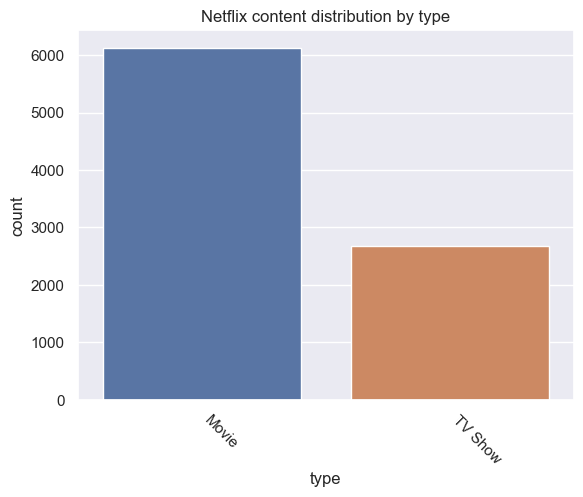

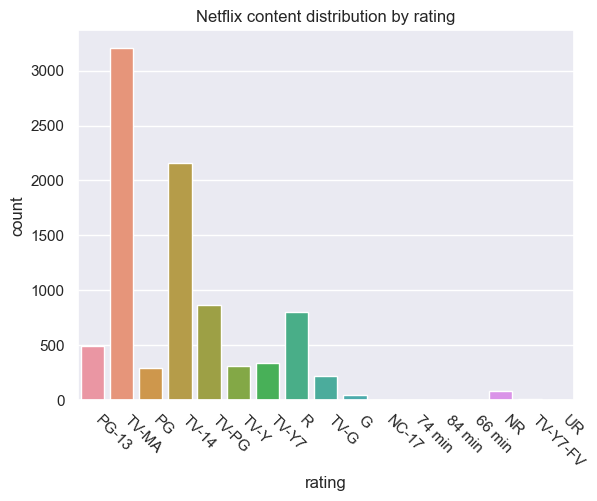

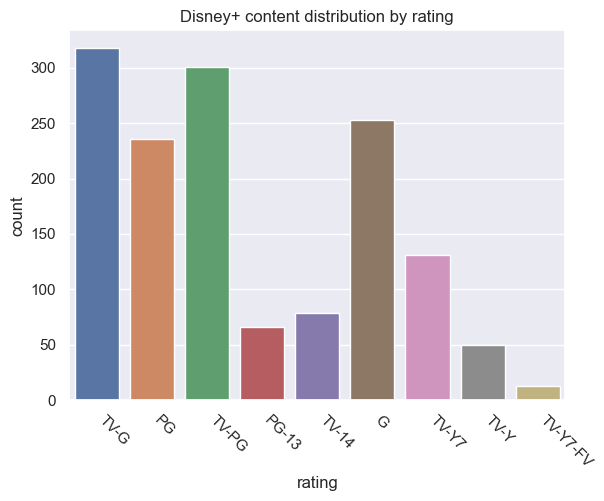

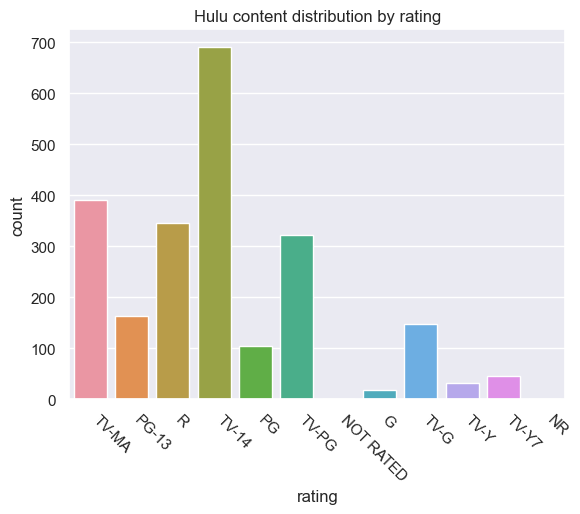

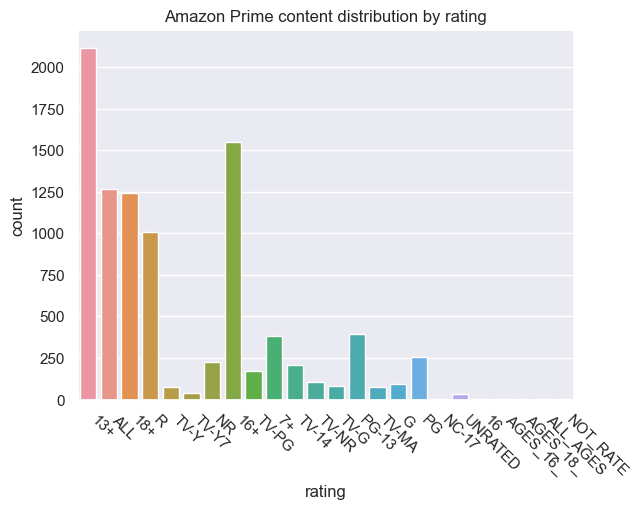

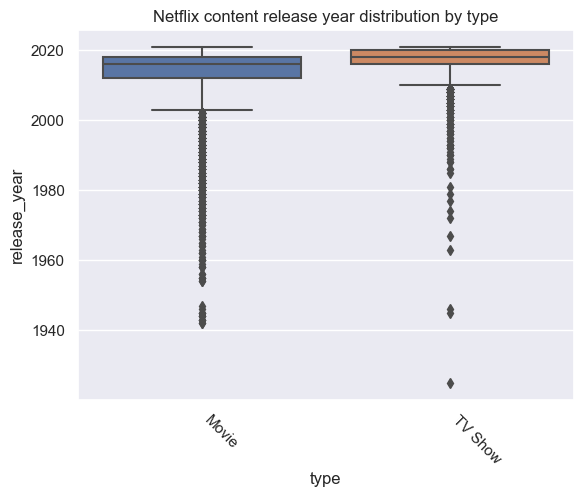

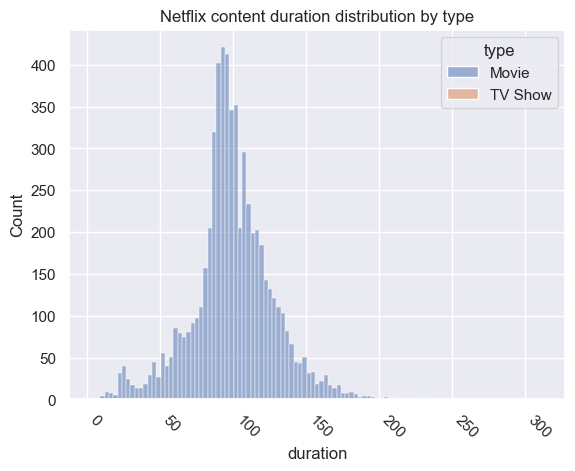

Netflix content duration summary statistics:
 count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64


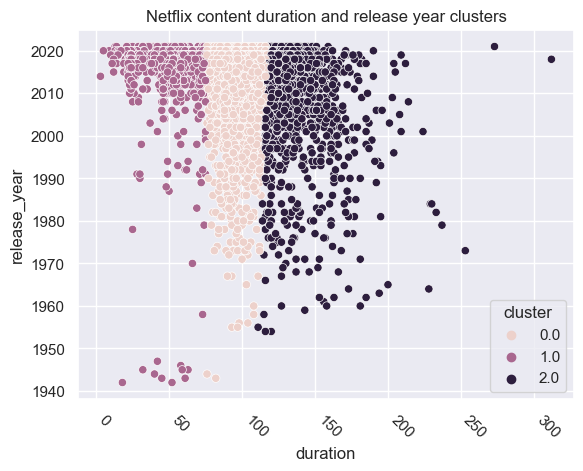

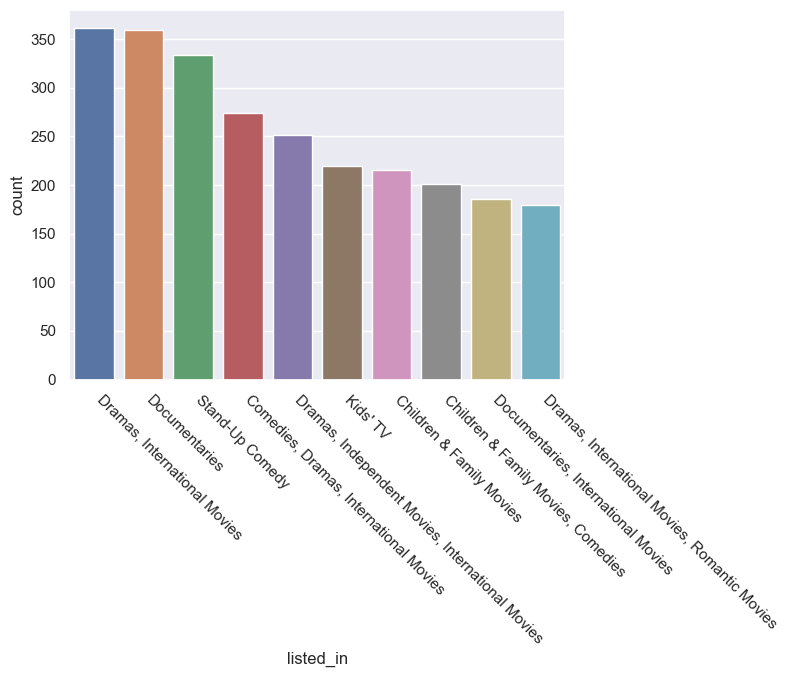

In [7]:
# Checking the shape of each dataset
print("Netflix dataset shape:", df1.shape)
print("Disney+ dataset shape:", df2.shape)
print("Hulu dataset shape:", df3.shape)
print("Amazon Prime dataset shape:", df4.shape)

# # Looking at the column names and data types
# print("Netflix dataset columns:", df1.columns)
# print("Netflix dataset data types:", df1.dtypes)
# print("Disney+ dataset columns:", df2.columns)
# print("Disney+ dataset data types:", df2.dtypes)
# print("Hulu dataset columns:", df3.columns)
# print("Hulu dataset data types:", df3.dtypes)
# print("Amazon Prime dataset columns:", df4.columns)
# print("Amazon Prime dataset data types:", df4.dtypes)

# Convert duration column to numerical format in the Netflix dataset
df1['duration'] = df1['duration'].apply(lambda x: int(x.replace(' min', '')) if isinstance(x, str) and 'min' in x else np.nan)

# # Checking for missing values and outliers
# print("Netflix dataset missing values:\n", df1.isnull().sum())
# print("Disney+ dataset missing values:\n", df2.isnull().sum())
# print("Hulu dataset missing values:\n", df3.isnull().sum())
# print("Amazon Prime dataset missing values:\n", df4.isnull().sum())

sns.set_theme(font_scale=1.0)

# Looking at the distribution of the target variable (if there is one)
sns.countplot(x='type', data=df1)
plt.title("Netflix content distribution by type")
plt.xticks(rotation=315, ha='left')
plt.show()

# Comparing the distribution of different features across datasets
sns.countplot(x='rating', data=df1)
plt.title("Netflix content distribution by rating")
plt.xticks(rotation=315, ha='left')
plt.show()
sns.countplot(x='rating', data=df2)
plt.title("Disney+ content distribution by rating")
plt.xticks(rotation=315, ha='left')
plt.show()

#Do some data cleaning to make the plots make sense, move anything from rating that contains "mins" and "Seasons" to the duration column
df3['duration'] = df3['duration'].fillna(df3['rating'].apply(lambda x: int(x.replace(' min', '')) if isinstance(x, str) and 'min' in x else np.nan))
df3['rating'] = df3['rating'].apply(lambda x: x if isinstance(x, str) and 'min' not in x and 'Season' not in x else np.nan)
sns.countplot(x='rating', data=df3)
plt.title("Hulu content distribution by rating")
plt.xticks(rotation=315, ha='left')
plt.show()
sns.countplot(x='rating', data=df4)
plt.title("Amazon Prime content distribution by rating")
plt.xticks(rotation=315, ha='left')
plt.show()

# Exploring the relationship between different features and the target variable (if there is one)
sns.boxplot(x='type', y='release_year', data=df1)
plt.title("Netflix content release year distribution by type")
plt.xticks(rotation=315, ha='left')
plt.show()

# Using visualizations such as scatter plots, histograms, box plots, and heat maps to better understand the data
sns.histplot(data=df1, x='duration', hue='type')
plt.title("Netflix content duration distribution by type")
plt.xticks(rotation=315, ha='left')
plt.show()

# Looking at summary statistics
print("Netflix content duration summary statistics:\n", df1['duration'].describe())

# Using clustering or dimensionality reduction techniques to identify groups or patterns within the data
from sklearn.cluster import KMeans
X = df1[['duration', 'release_year']].dropna()
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
df1.loc[X.index, 'cluster'] = labels
sns.scatterplot(x='duration', y='release_year', hue='cluster', data=df1.dropna(subset=['duration']))
plt.title("Netflix content duration and release year clusters")
plt.xticks(rotation=315, ha='left')
plt.show()

# Analyzing the frequency of different genres, release years, and other categorical variables
sns.countplot(x='listed_in', data=df1, order=df1['listed_in'].value_counts().iloc[:10].index)
plt.xticks(rotation=315, ha='left')
plt.show() 

- Load the datasets: Import the datasets from the data folder into your analysis environment.

- Data Cleaning and Preparation: Perform data cleaning and preparation steps such as removing duplicates, handling missing data, merging related data, and creating necessary features.

- Explore Data: Use data visualization techniques to explore the data and identify patterns, trends, and relationships between variables. Identify the most common genres on each platform and analyze the distribution of genres on each platform.

- Genre Analysis by Director: Analyze the genre participation of each director across all platforms and identify the genre each director participated in the most.

- Genre Analysis by Actor: Analyze the genre participation of each actor across all platforms and identify the genre each actor participated in the most.

- Conclusion and Interpretation: Draw conclusions from the analysis and interpret the findings to provide insights into the most popular genres on each platform, the genres that each director and actor participated in the most, and any other interesting patterns or trends observed in the data.

- Report: Summarize the findings of the analysis in a report, including the data preparation and cleaning steps, exploratory data analysis, genre analysis by director and actor, and the conclusions and insights drawn from the analysis.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def seperate_listed_in(df):
    df['listed_in'] = df['listed_in'].str.split(', ')
    df = df.explode('listed_in')
    return df

def genres(df):
    df['listed_in'] = df['listed_in'].str.strip().str.lower()
    hulu_genres = df.groupby('listed_in').size().reset_index(name='counts').sort_values(['counts'], ascending=False)
    hulu_genre_distribution = hulu_genres.groupby('listed_in')['counts'].sum().sort_values(ascending=False)

    return hulu_genre_distribution

def genre_plot(df):
    # visualize the distribution of genres on each platform
    plt.figure(figsize=(10,6))
    plt.plot(df.index, df.values, label='Hulu')
    plt.title('Distribution of Genres on Streaming Platforms')
    plt.xlabel('Genres')
    plt.ylabel('Number of Titles')
    plt.xticks(rotation=315, ha='left')
    # plt.legend()
    plt.show()

def find_name_per_genre(df,str):
    # create a copy of the original dataframe
    df_copy = df.copy()

    # split the 'listed_in' column into multiple rows based on delimiter ','
    df_copy = df_copy.assign(listed_in=df_copy.listed_in.str.split(', ')).explode('listed_in')

    # create a new dataframe with 'director' and 'listed_in' columns only
    df_director_genre = df_copy[[str, 'listed_in']]

    # group the dataframe by 'listed_in' and 'director', and count the number of occurrences
    df_director_genre = df_director_genre.groupby(['listed_in', str]).size().reset_index(name='counts')

    # for each genre, find the director with the highest count and create a new dataframe
    result_df = pd.DataFrame(columns=['genre', str, 'counts'])
    for genre in df_director_genre['listed_in'].unique():
        df_genre = df_director_genre[df_director_genre['listed_in'] == genre]
        max_counts = df_genre['counts'].max()
        row = df_genre[df_genre['counts'] == max_counts].iloc[0]
        result_df = result_df.append({'genre': genre, str: row[str], 'counts': max_counts}, ignore_index=True)

    return result_df

def seperate_director(df,str):
    df.dropna(subset=[str], inplace=True)
    df[str] = df[str].str.split(', ')
    df = df.explode(str)
    return df


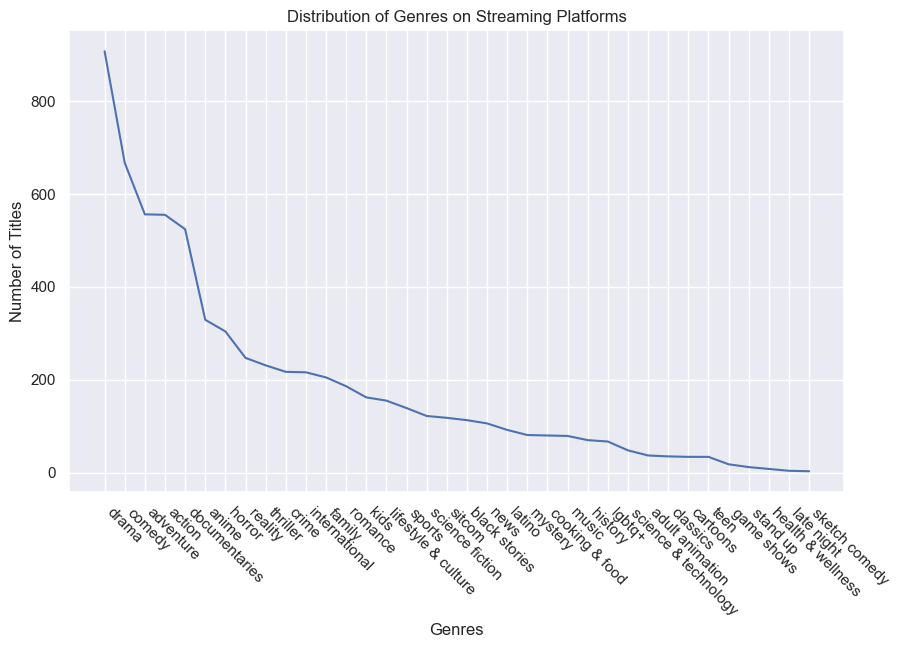

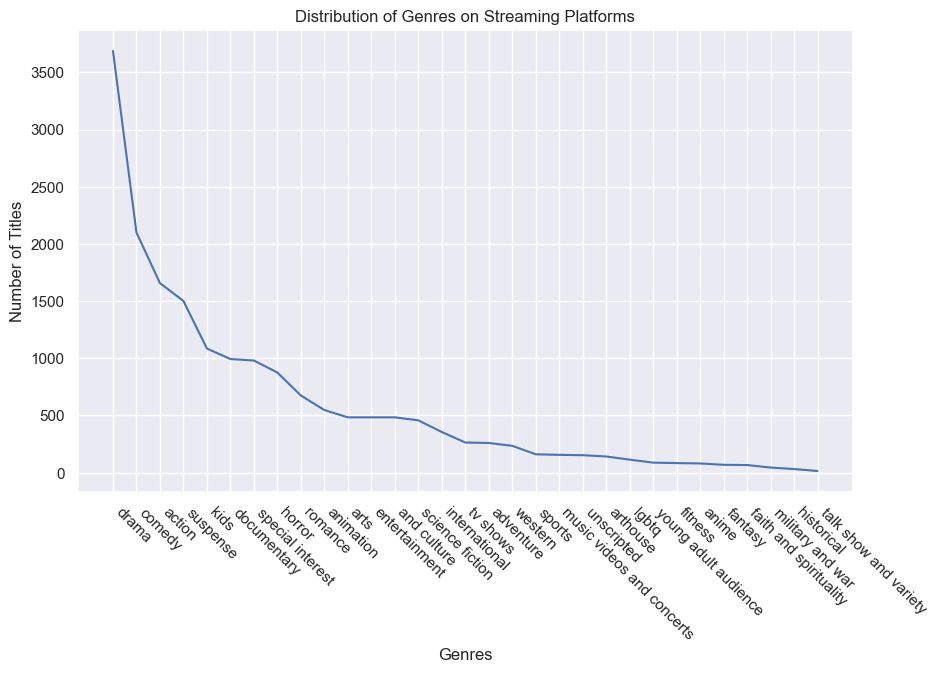

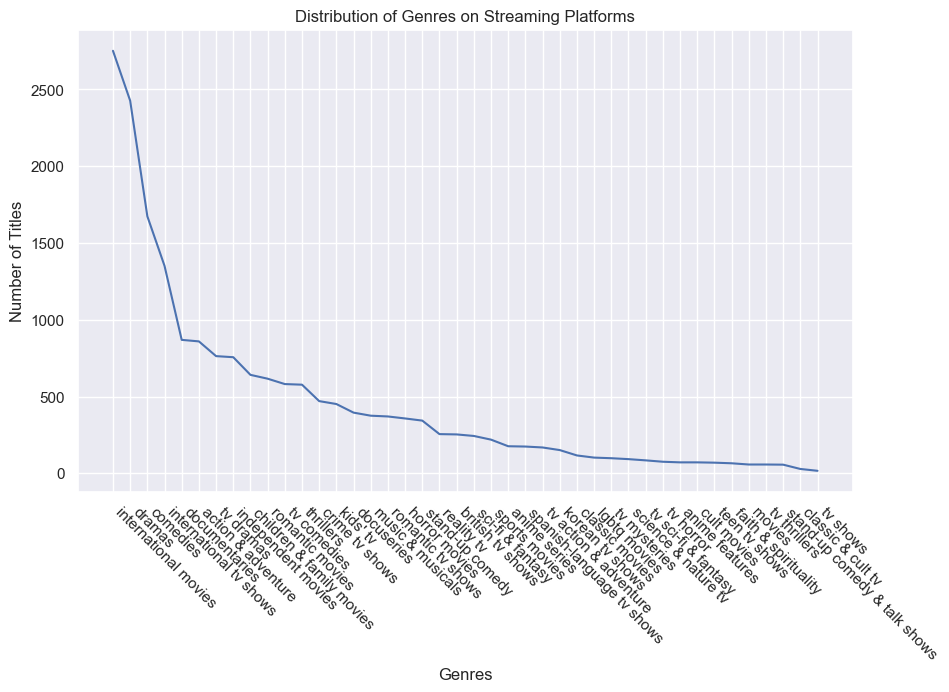

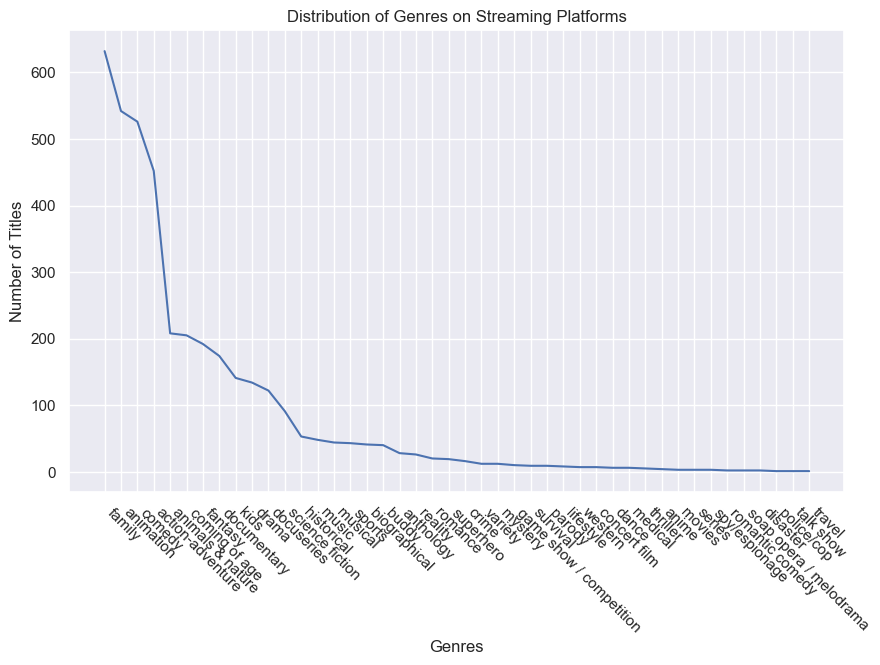

In [9]:
# import the datasets from "../data/raw/" using pandas
hulu_df = pd.read_csv('../data/raw/hulu_titles.csv')
prime_df = pd.read_csv('../data/raw/amazon_prime_titles.csv')
netflix_df = pd.read_csv('../data/raw/netflix_titles.csv')
disney_df = pd.read_csv('../data/raw/disney_plus_titles.csv')
# for listed_in, cast, and director, split the string into a list of strings and seperate them into different rows
hulu_df = seperate_listed_in(hulu_df)
prime_df = seperate_listed_in(prime_df)
netflix_df = seperate_listed_in(netflix_df)
disney_df = seperate_listed_in(disney_df)
hulu_genre_distribution = genres(hulu_df)
prime_genre_distribution = genres(prime_df)
netflix_genre_distribution = genres(netflix_df)
disney_genre_distribution = genres(disney_df)
genre_plot(hulu_genre_distribution)
genre_plot(prime_genre_distribution)
genre_plot(netflix_genre_distribution)
genre_plot(disney_genre_distribution)
hulu_df_director = seperate_director(hulu_df,'director')
prime_df_director = seperate_director(prime_df,'director')
netflix_df_director = seperate_director(netflix_df,'director')
disney_df_director = seperate_director(disney_df,'director')
prime_director_per_genre = find_name_per_genre(prime_df_director, 'director')
prime_director_per_genre.to_csv('../data/processed/prime_director_per_genre.csv', index=False)
netflix_director_per_genre = find_name_per_genre(netflix_df_director, 'director')
netflix_director_per_genre.to_csv('../data/processed/netflix_director_per_genre.csv', index=False)
disney_director_per_genre = find_name_per_genre(disney_df_director, 'director')
disney_director_per_genre.to_csv('../data/processed/disney_director_per_genre.csv', index=False)
prime_df_cast = seperate_director(prime_df,'cast')
netflix_df_cast = seperate_director(netflix_df,'cast')
disney_df_cast = seperate_director(disney_df,'cast')
prime_cast_per_genre = find_name_per_genre(prime_df_cast, 'cast')
prime_cast_per_genre.to_csv('../data/processed/prime_cast_per_genre.csv', index=False)
netflix_cast_per_genre = find_name_per_genre(netflix_df_cast, 'cast')
netflix_cast_per_genre.to_csv('../data/processed/netflix_cast_per_genre.csv', index=False)
disney_cast_per_genre = find_name_per_genre(disney_df_cast, 'cast')
disney_cast_per_genre.to_csv('../data/processed/disney_cast_per_genre.csv', index=False)